In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
plt.style.use('ggplot')
from scipy import stats

### Central tendency

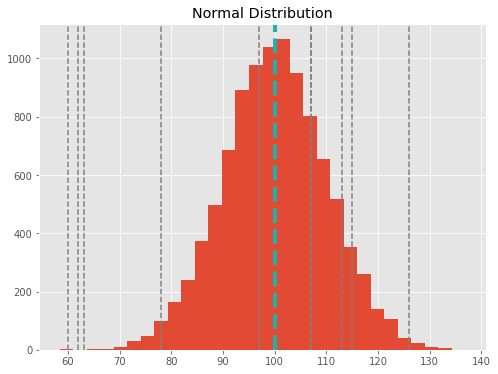

In [73]:
nums = np.random.normal(loc = 100,scale = 10, size = 10000)

figsize(8,6)
plt.title('Normal Distribution')
plt.hist(nums,bins = 30)
plt.axvline(np.mean(nums), linestyle = '--', color = 'lightseagreen', linewidth = 4)
for _ in range(10):
    plt.axvline(np.random.randint(60,130), linestyle = '--', color = 'gray')
plt.show()

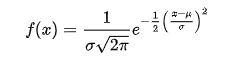

### Dispersion
variance - is a square(area)       
standard deviation - is a length(segment)       

In [13]:
def variance(arr,ddof = 0):
    N = len(arr)
    return ((arr - arr.mean())**2).sum() / (N - ddof)

def std(arr, ddof = 0):
    return np.sqrt(variance(arr, ddof = ddof))

Rewrite the formular

In [14]:
def mean(arr):
    '''Maximum likelihood estimation'''
    return sum(arr) / len(arr)

def deviation(arr):
    '''This is a distance'''
    return arr - mean(arr)

def squared_deviation(arr):
    '''This is the areas of mean squares'''
    return deviation(arr) ** 2

def average_squared_deviation(arr):
    '''This the area of a standard sqarure'''
    return squared_deviation(arr).sum() / len(arr)

def average_root_squared_deviation(arr):
    '''This is the edge length of a standard square '''
    return np.sqrt(average_squared_deviation(arr))

In [15]:
average_root_squared_deviation(nums) == np.std(nums)

True

**Takeaway: Use a standard length or standard area of a square to measure dispersion**

### Where r U             
How much you are away from the mean - not comparable                    
How many standard deviations you are away from the mean - comparable                 

In [16]:
90 - nums.mean(), 80 - nums.mean()

(-9.947689933397314, -19.947689933397314)

far or not far - depens on variability of the distribution

In [17]:
(90 - nums.mean()) / std(nums), (80 - nums.mean()) / std(nums)

(-0.9987510034285353, -2.0027539529730674)

**Conclusion: The 2 samples are about 1 standard deviation from each other**

### Two Distributions - who is more unpopular

Xiaoming: -2.566666666666667, Xiaohua: -3.5277777777777777


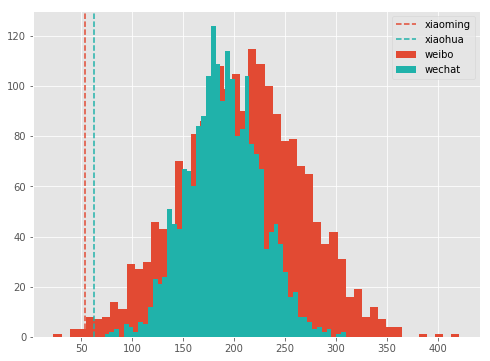

In [18]:
plt.style.use('ggplot')
weibo_mean = 208
wechat_mean = 190

wechat_std = 36
weibo_std = 60

xiaoming_weibo = 54
xiaohua_wechat = 63

# standard scaler, converted to standard normal distribution
Z_xiaoming = (xiaoming_weibo - weibo_mean) / weibo_std
Z_xiaohua = (xiaohua_wechat - wechat_mean) / wechat_std

print('Xiaoming: {}, Xiaohua: {}'.format(Z_xiaoming, Z_xiaohua))

plt.hist(stats.norm.rvs(loc = weibo_mean, scale = weibo_std, size = 2000),bins = 50, label = 'weibo')
plt.axvline(xiaoming_weibo, linestyle = '--', label = 'xiaoming')

plt.hist(stats.norm.rvs(loc = wechat_mean, scale = wechat_std, size = 2000),bins = 50, color = 'lightseagreen', label = 'wechat')
plt.axvline(xiaohua_wechat, linestyle = '--', color = 'lightseagreen', label = 'xiaohua')

plt.legend()
plt.show()

**Conclusion: Xiaohua is more unpopular than Xiaoming**   

In a standard normal distribution, Probability below 1.2 is  0.8856


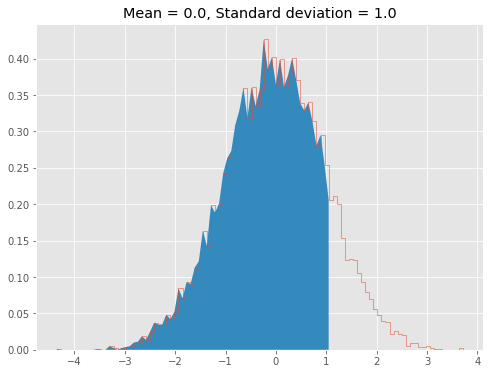

In [19]:
nums = np.random.normal(loc = 100,scale = 10, size = 10000)
standard_nums = (nums - nums.mean()) / nums.std()
val = 1.2

probability = len(standard_nums[standard_nums< val]) / len(standard_nums)

print(f'In a standard normal distribution, Probability below {val} is ',probability)
x = plt.hist(standard_nums,bins = 100, histtype = 'step', density = True)
loc = np.where(x[1]<val)[0][-1]
plt.fill_between(x[1][:loc],x[0][:loc] )
plt.title('Mean = {}, Standard deviation = {}'.format(round(standard_nums.mean(),3), standard_nums.std()))
plt.show()

Convert a distribution to a standard normal distribution

**Suppose we want to know the probability of a value less than -1**

#### Cumulative distribution Function to solve 
recall `empirical cumulative distribution function`    
which you learn in datacamp, `generated using observed data`        

Probability of obtaining a value less than `a give value` in a `standard normal distribution`

In [20]:
stats.norm.cdf(1.2)

0.8849303297782918

What about `between`, **subtract a negative cumulative prob from a positive cumulative prob**

In [21]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

#### Probability of a random draw from a standard normal distribution, that falls into a given range
#### And you can compute `any value in the population` with the `reset of the population`

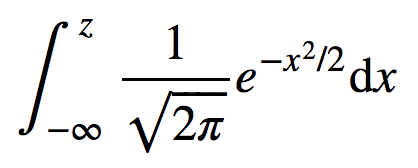

## Sampling Distribution

In [22]:
from itertools import combinations

In [31]:
die = [1,2,3,4]

possible_outcomes = [[a,b] for a in  die for b in die]
sample_means = [np.mean(out) for out in possible_outcomes]
probability = len([i for i in sample_means if i > 2.5]) / len(sample_means)

print('Number of possible outcomes', len(possible_outcomes))
print(possible_outcomes)
print('Sample means')
print(sample_means)
print('Probability of rolling 2 dices having mean value > 2.5:', probability)

Number of possible outcomes 16
[[1, 1], [1, 2], [1, 3], [1, 4], [2, 1], [2, 2], [2, 3], [2, 4], [3, 1], [3, 2], [3, 3], [3, 4], [4, 1], [4, 2], [4, 3], [4, 4]]
Sample means
[1.0, 1.5, 2.0, 2.5, 1.5, 2.0, 2.5, 3.0, 2.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0]
Probability of rolling 2 dices having mean value > 2.5: 0.375


Enumerate(穷举了可能出现的样本，并且每个样本出现的概率都是均等的，然后我们才能获得一个解析解)                       
这儿总体是均匀的离散分布（discrete uniform distribution）                     
且总体很小，我们才能穷举出所有sample出现的可能性

population: die    
samples = possible_outcomes[i]

population distribution: [1,2,3,4]                       
sampleing distribution: [1.0, 1.5, 2.0, 2.5, 1.5, 2.0, 2.5, 3.0, 2.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0]     
sample size = 2

In [32]:
np.mean(sample_means)

2.5

In [33]:
np.mean(possible_outcomes)

2.5

In [34]:
np.std(possible_outcomes)

1.118033988749895

In [35]:
np.std(sample_means)

0.7905694150420949

In [36]:
np.std(possible_outcomes) / np.std(sample_means)

1.414213562373095

In [37]:
sample_size = 2
np.sqrt(sample_size)

1.4142135623730951

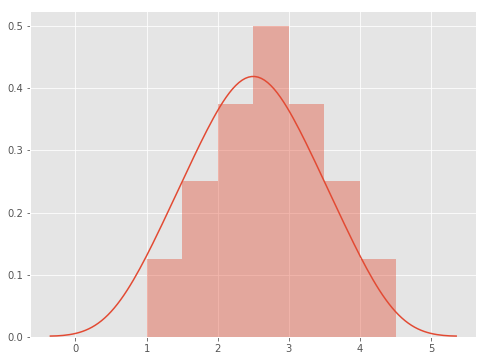

In [44]:
sns.distplot(sample_means, bins = np.arange(1,5, 0.5))
plt.show()

### Central limit theorem(背过就行了):                               
1. The sample mean distribution - [1.0, 1.5, 2.0, 2.5, 1.5, 2.0, 2.5, 3.0, 2.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0]  
    is called `sampling distribution`              
2. Sampling distribution is `normal distributed`  
3. `The mean of the sample means(mean of the sampling distribution) equals population mean`                   
4. The standard deviation of sampling distribution equals `sigma / np.sqrt(sample_size)`, where sigma is the standard deviation of the population     
5. The value mentioned in 4 is called `standard error - SE`     

**It is not easy to observe a normal distribution in real life**   
#### But you get it, and you can use the <font color = 'darked'> property of this normal distirbution 

#### Guess?

In [70]:
six_side_die = [1,2,3,4,5,6]
n = np.random.randint(1000,10000)
val1 = np.random.choice(six_side_die, size = (n, 2)).mean(axis = 1).mean()
val2 = np.random.choice(six_side_die, size = (n, 2)).mean(axis = 1).std()
# val1,val2

In [71]:
# np.mean(six_side_die),  np.std(six_side_die) / np.sqrt(2)

### Shapes      
mean - fixed                    
Standardard error(SE) - (depends on `sigma` and `np.sqrt(sample_size)`)     

sigma increase - SE increase                  
sample size increase - SE decrease           

IF WE COLLECTION MORE DATA ON EACH SAMPLE, THE SAMPLING DISTRIBUTION WILL GET SKINNER    

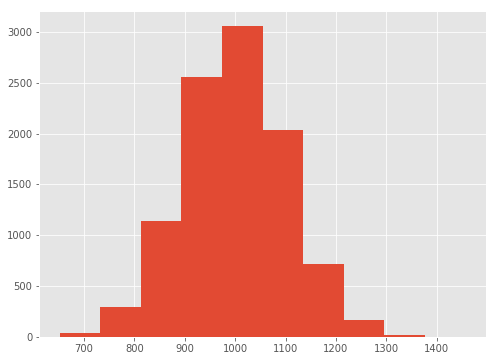

In [77]:
population = np.random.normal(1000,100,10000)
plt.hist(population)
plt.show()

**Make sampling distribution by sampling**

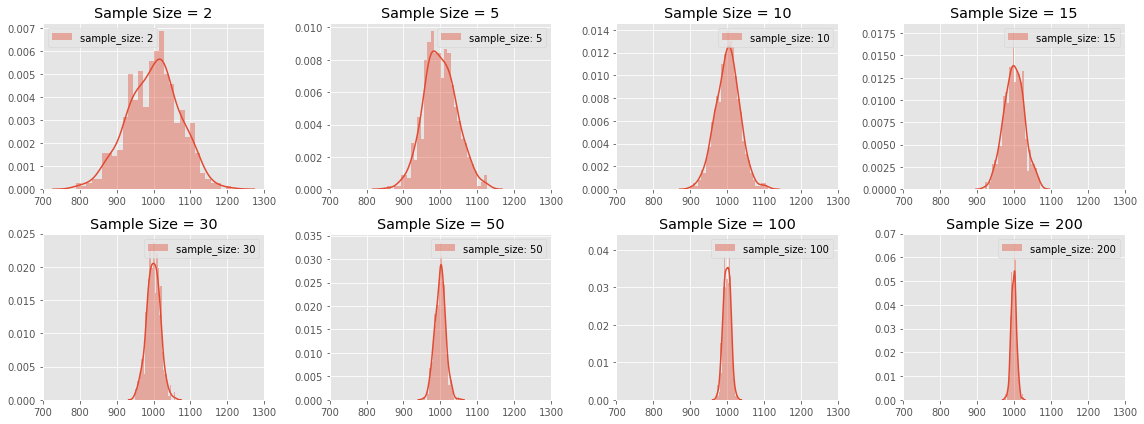

In [112]:
figsize(16,6)
sample_sizes = [2,5,10,15,30,50,100,200]
means = []
stds = []
for i, sample_size in enumerate(sample_sizes):
    plt.subplot(2,4,i+1)
    sampling_dist = np.random.choice(population, size = (500,sample_size)).mean(axis = 1)
    
    means.append(np.mean(sampling_dist))
    stds.append(np.std(sampling_dist))
    sns.distplot(sampling_dist, bins =30, kde = True, label = 'sample_size: {}'.format(sample_size))
    plt.xlim(700,1300)
    plt.legend()
    plt.title('Sample Size = {}'.format(sample_size))
plt.tight_layout()
plt.show()

### We know the distribution, we don't simulate

In [116]:
pd.DataFrame(zip(sample_sizes, means, stds), columns = ['samplesize','mean','se'])

,samplesize,mean,se
0,2,1000.081104,70.201145
1,5,999.431364,44.469616
2,10,1000.940448,32.772221
3,15,999.609433,27.224931
4,30,999.481789,18.126403
5,50,999.291766,14.330761
6,100,998.991241,9.841785
7,200,998.858798,7.181357


In [123]:
population_mean = np.mean(population)
population_std = np.std(population)

print('Sample size,\t\t se')
for sample_size in sample_sizes:
    print(sample_size,'\t\t', population_std / np.sqrt(sample_size))

Sample size,		 se
2 		 71.0350902227743
5 		 44.92653577990489
10 		 31.767858105190804
15 		 25.93834752628544
30 		 18.341181428609747
50 		 14.20701804455486
100 		 10.045878799744386
200 		 7.10350902227743


### 我们可以通过简单的公式知道抽样分布的形状的 - 计算SE               
### 我们也可以通过sampling知道sampling distribution 的standard deviation = SE
### Anyway, 我们可以使用正态分布的性质了               

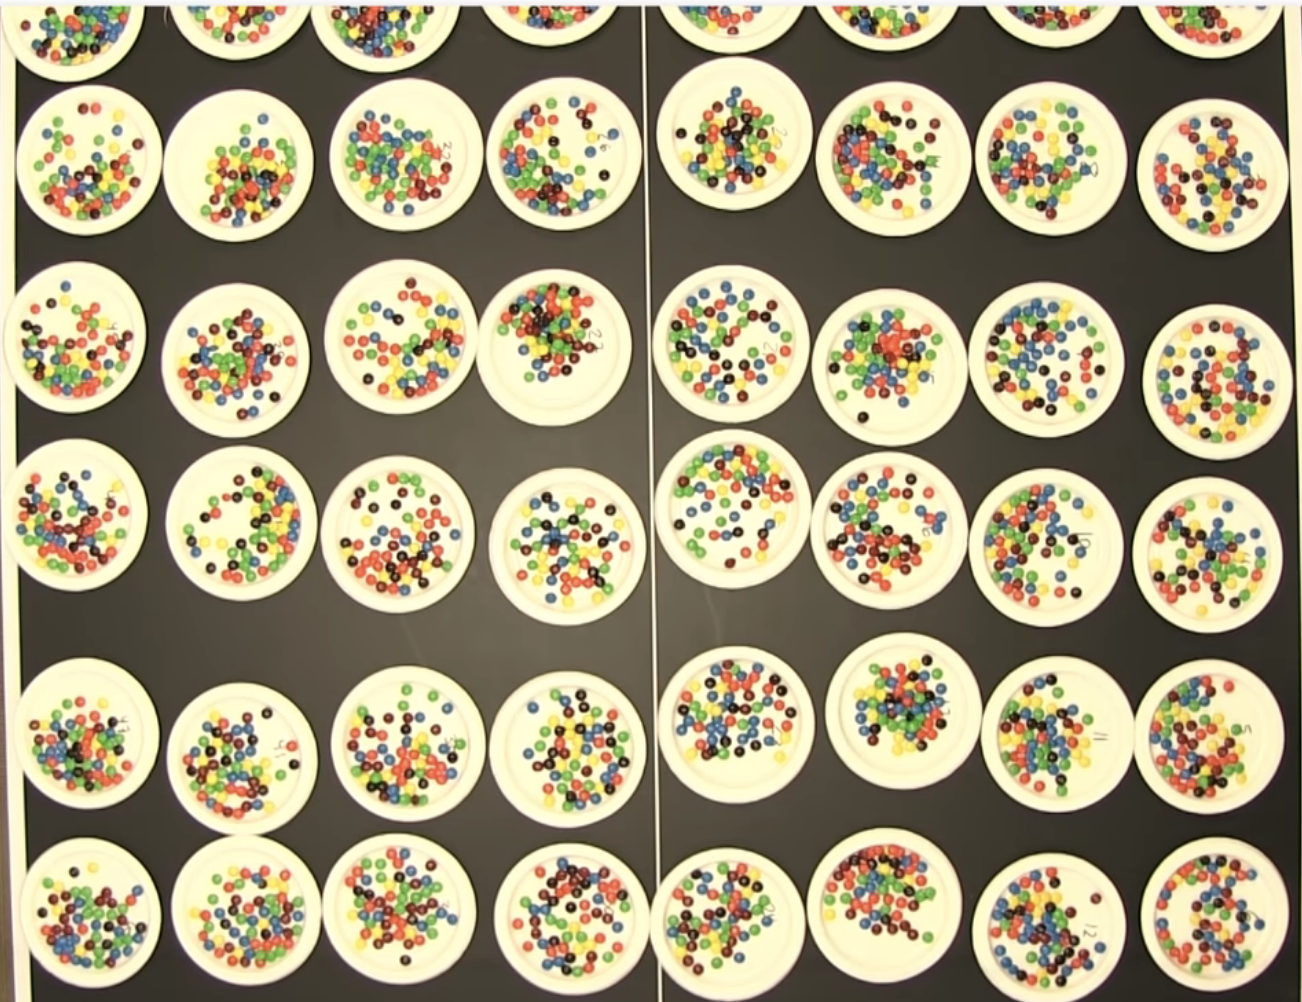

### Where does a sample mean falls on sampling distribution

7.7656675749318795 7.824000000000001


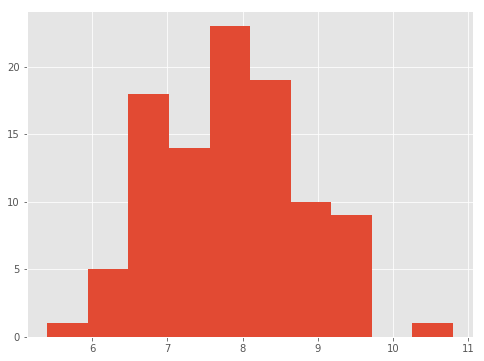

In [191]:
# Make some bags, ignore this step
colors = ['r','b','g','b','y','brown']
probs = np.random.randint(20,100,size = len(colors))
probs=  probs/probs.sum()
bags = np.random.choice(colors, p = probs, size = (1000,30))

# take 5 plate, calcuate mean number of green candies
blue_counts = [len([color for color in bag if color == 'g']) for bag in bags]
sampling_dist = np.random.choice(blue_counts, size = (100,5)).mean(axis = 1)
plt.hist(sampling_dist)
print(probs[2] * 30, np.mean(sampling_dist))

### Compare a sample with population - is this sample from population

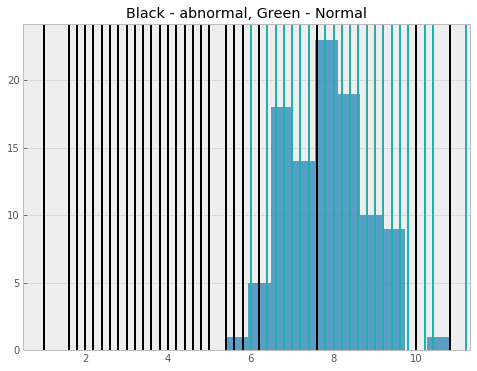

In [208]:
plt.style.use('bmh')
plt.hist(sampling_dist, alpha = 0.8)
for _ in range(100):
    normal_bags = np.random.choice(colors, p = probs, size = (5,30))
    sample = [len([color for color in bag if color == 'g']) for bag in normal_bags]
    sample_mean = np.mean(sample)

    new_probs = np.random.randint(20,100,size = len(colors))
    new_probs=  new_probs/new_probs.sum()
    abnormal_bags = np.random.choice(colors, p = new_probs, size = (5,30))
    sample_ab = [len([color for color in bag if color == 'g']) for bag in abnormal_bags]
    sample_mean_ab = np.mean(sample_ab)

    
    plt.axvline(sample_mean, color = 'lightseagreen')
    plt.axvline(sample_mean_ab, color = 'black')
plt.title('Black - abnormal, Green - Normal')
plt.show()


### Theoretically

In [209]:
sampling_dist

array([ 6.8,  7.8,  7. ,  6.6,  8. ,  8.2,  8.4,  9.4,  7. ,  7.6,  9.2,
        7.2,  8. ,  6.4,  8.2,  9. ,  8.2,  7.4,  6.6,  8. ,  6.8,  8.4,
        9.2,  8.4,  8.8,  9.6,  7.6,  6.4,  9. ,  9.6,  8. ,  7.2,  7.8,
        7.6,  6.8,  8.2,  7.6,  7.2,  8.8,  9. ,  9.6,  8.2,  7.2,  7.8,
        8. ,  7.8,  7. ,  7.8,  8.6,  7.2,  7. ,  6.8,  8. ,  9.4,  7.6,
        7. ,  7.4,  7.2,  9.4,  6.8,  6.6,  6.6,  7.6,  8.2,  7.8,  8.8,
        7.4,  9.2,  8.2,  7.6,  6. ,  8.8,  7.8, 10.8,  8.6,  8.6,  8.4,
        8.4,  7. ,  8.8,  6. ,  7. ,  6.8,  8.8,  8.8,  7.8,  5.4,  7.6,
        8.2,  7.4,  7.2,  6.8,  8.6,  8.2,  8.2,  7.2,  6.2,  7.4,  7.6,
        7.2])

### Traditional Z Test procedure

H0 : This sample comes from the population     $\mu(population) = \mu(sample)$                       
Ha: This sample not comes from the population  $\mu(population) \neq \mu(sample)$                      

In [242]:
population = [len([color for color in bag if color == 'g']) for bag in bags]
apopulation_mean = np.mean(population)
population_std = np.std(population)
one_sample_mean = 6.5 #4
Z_statistic = (one_sample_mean - population_mean) / (population_std / np.sqrt(5))
p = stats.norm.cdf(Z_statistic)
alpha = 0.05
Z_critical = stats.norm.ppf(alpha)
Z_critical,Z_statistic,p

(-1.6448536269514729, -1.2194276665818882, 0.11134095720783832)

**Inference:**            
Z_critical < Z_statistic              
P > alpha = 0.05    
Unable to reject null hypothesis H0                 

Z - statistic: number of standard deviations(1) away from mean(0) in a standard normal distribution                                     
p - Probability of obtaining a value from sampling distribution less than or equal to a given value               
p is extremly low - reject null hypothesis            

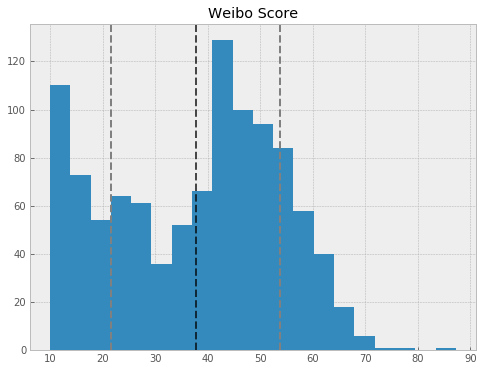

In [270]:
import pandas as pd
weibo = pd.read_excel('weibo.xlsx', header = None).values.flatten()
mu = np.mean(weibo)
sigma = np.std(weibo)

plt.title('Weibo Score')
plt.axvline(mu,linestyle = '--', color = 'k', alpha = 0.7)
plt.axvline(mu-sigma, linestyle = '--', color = 'gray')
plt.axvline(mu+sigma, linestyle = '--', color = 'gray')
plt.hist(weibo, bins = 20)
plt.show()

In [263]:

print(mu, sigma)

37.71905483252976 16.036658421908225


### See sampling distribution

In [301]:
sample_size = 250

In [302]:
se = sigma / np.sqrt(sample_size)
se

1.0142473334270294

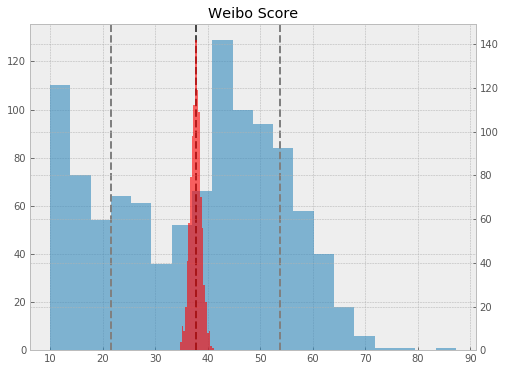

In [303]:
sd = np.random.normal(mu, se, 1000)

fig,ax = plt.subplots()
ax2 = ax.twinx()

plt.title('Weibo Score')
ax.axvline(mu,linestyle = '--', color = 'k', alpha = 0.7)
ax.axvline(mu-sigma, linestyle = '--', color = 'gray')
ax.axvline(mu+sigma, linestyle = '--', color = 'gray')
ax.hist(weibo, bins = 20, alpha = 0.6)
ax2.hist(sd, color = 'r', alpha = 0.6,bins = 20)
plt.show()

In [304]:
jay_followers = np.random.normal(40, sigma, size = sample_size).mean()
jay_mean = 40

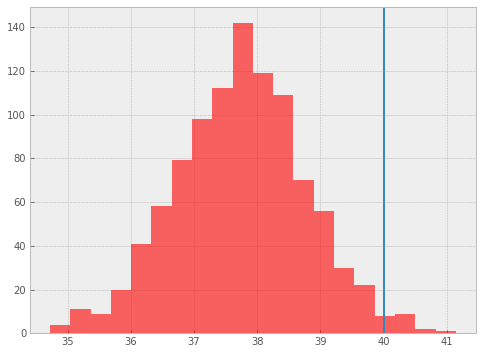

In [305]:
plt.hist(sd, color = 'r', alpha = 0.6,bins = 20)
plt.axvline(jay_mean)
plt.show()

Question: how many standard deviation above the mean for Jay followers

In [306]:
(jay_mean - mu)/  se

2.248904278370821

What is the probability of randomly select a sample from weibo, that is at least 40

In [307]:
1 - stats.norm.cdf((jay_mean - mu) / se)

0.012259293376508218